## Sentiment Analysis

In this exercise we use the IMDb-dataset, which we will use to perform a sentiment analysis. The code below assumes that the data is placed in the same folder as this notebook. We see that the reviews are loaded as a pandas dataframe, and print the beginning of the first few reviews.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Indlæs data
df_reviews = pd.read_csv("reviews.txt", header=None, names=["review"], encoding="utf-8")
df_labels  = pd.read_csv("labels.txt",  header=None, names=["label"], encoding="utf-8")

X = df_reviews.review
y = df_labels.label

**(a)** Split the reviews and labels in test, train and validation sets. The train and validation sets will be used to train your model and tune hyperparameters, the test set will be saved for testing. Use the `CountVectorizer` from `sklearn.feature_extraction.text` to create a Bag-of-Words representation of the reviews. Only use the 10,000 most frequent words (use the `max_features`-parameter of `CountVectorizer`).

## Input-lag


In [13]:
# Split i 20% test, 30% validering og 70% training

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.30, random_state=42)

print(f"Training: {len(X_train)}, Validation: {len(X_val)}, Test: {len(X_test)}")


Training: 14000, Validation: 6000, Test: 5000


In [16]:
# Bag of words på de 10.000 mest hyppige ord

# "Vi bruger CountVectorizer til at omdanne tekst til en BoW-repræsentation. Det betyder, at hvert ord bliver en kolonne, og hver anmeldelse bliver en række i en matrix. Hvis et ord optræder to gange i en anmeldelse, står der 2 i den tilhørende celle. Modellen får dermed en numerisk vektor for hver tekst, som den kan bruge til træning."

vectorizer = CountVectorizer(max_features=10000)

# BoW, finder de 10.000 mest brugte ord, laver en kolonne pr. ord. Hver tekst bliver en vektor. Output = talmatrice
X_train_words = vectorizer.fit_transform(X_train)
X_val_words = vectorizer.transform(X_val)
X_test_words = vectorizer.transform(X_test)

print("Train:", X_train_words.shape)
print("Val:", X_val_words.shape)
print("Test:", X_test_words.shape)

Train: (14000, 10000)
Val: (6000, 10000)
Test: (5000, 10000)


**(b)** Explore the representation of the reviews. How is a single word represented? How about a whole review?

['abandon' 'abandoned' 'abby' 'abc' 'abducted' 'abilities' 'ability'
 'able' 'aboard' 'abominable']


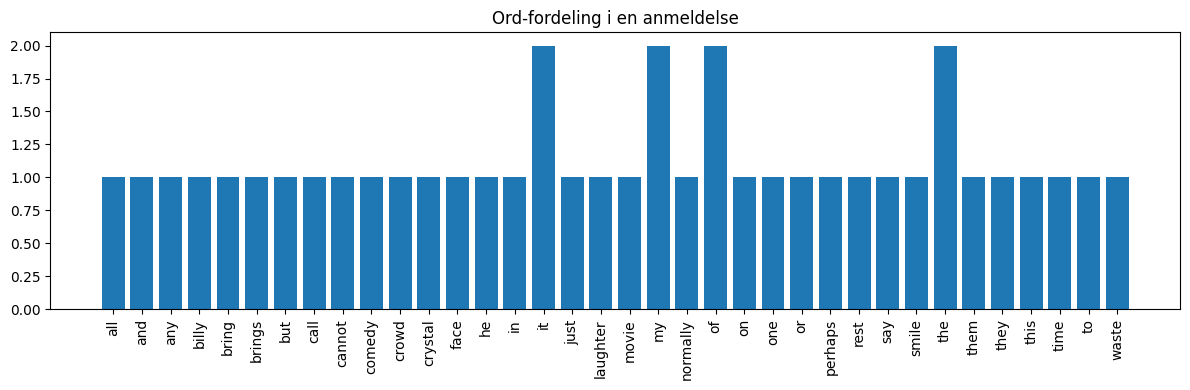

In [17]:
# Repræsentation af enkelte ord
feature_names = vectorizer.get_feature_names_out()
print(feature_names[:10])

# Repræsentation af en anmeldelse
row_vector = X_train_words[0]
dense_vector = row_vector.toarray()[0]

plt.figure(figsize=(12, 4))
plt.bar(
    [feature_names[i] for i in range(len(dense_vector)) if dense_vector[i] > 0],
    [dense_vector[i] for i in range(len(dense_vector)) if dense_vector[i] > 0]
)
plt.xticks(rotation=90)
plt.title("Ord-fordeling i en anmeldelse")
plt.tight_layout()
plt.show()

**(c)** Train a neural network with a single hidden layer on the dataset, tuning the relevant hyperparameters to optimize accuracy.

### Skjult-lag
Et skjult lag er et **mellemled mellem input og output**, som netværket selv lærer at justere.
Neuronerne i de skjulte lag lærer at genkende komplekse mønstre og signaler, som ikke er direkte synlige i inputdataene.

I denne opgave anvendes et skjult lag til at bearbejde de 10.000 input-funktioner fra Bag-of-Words og kombinere dem til mere **abstrakte, meningsfulde mønstre**.
Det skjulte lag hjælper modellen med at identificere hvilke typer ord, vendinger eller kombinationer, der typisk forbindes med **positive eller negative anmeldelser.**

#### ReLU
Der anvendes **ReLU**(Recitied Linear Unit) som aktiveringsfunktion i det skjulte lag.
ReLU vælges fordi den:
- Er hurtig til at beregne
- Bevarer gradienten for positive input
- Undgår problemer med saturering, hvor gradienten ellers forsvinder

Alternativer:
 - **Tanh**, fungerer bedre end sigmoid i skjulte lag, men er stadig langsommere og kan saturere
 - **Sigmoid** frarådes i skjulte lag, da gradienten hurtigt forsvinder ved ekstreme værdier

### Output-lag
Der er to sentiment-klasser i opgaven: positiv og negativ.
Det gør opgaven til en binær klassifikation, hvor modellen skal forudsige om en anmeldelse tilhører klasse 1 (positiv) eller 0 (negativ).

#### Sigmoid
I denne opgave anvendes Sigmoid som aktiveringsfunktion i output-laget
Sigmoid-funktionen returnerer et output mellem 0 - 1, som kan tolkes som en sandsynlighed for, at input hører til klasse 1 (positiv anmeldelse).

Når output er > 0.5, tolkes det som klasse 1, ellers klasse 0(negativ)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Definering af modellen

model = models.Sequential([])

**(d)** Test your sentiment-classifier on the test set.

**(e)** Use the classifier to classify a few sentences you write yourselves. 